# Project: Wrangling and Analyzing Data

## Data Gathering
In this section, all three pieces of Data used for this project are gathered and loaded into a pandas Dataframe

In [1]:
#import the needed libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import tweepy
import json
import requests
from PIL import Image
from io import BytesIO



%matplotlib inline

In [2]:
#Directly download the WeRateDogs Twitter archive data and load into a dataframe(twitter_df)
twitter_df = pd.read_csv("twitter-archive-enhanced.csv")


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#use the requests library to download the tweet image prediction file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open("image-predictions.tsv",'wb') as f:
    f.write(r.content)

In [4]:
#Load the image-predictions dataset into a data frame
imageP= pd.read_csv("image-predictions.tsv", sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)




In [ ]:
#put the tweet_id column in a list in order to loop through it
#store each tweets content line by line in a json format in the text file

Tweets_id = list(twitter_df.tweet_id)

import json

count = 0
with open('tweet_json.txt', mode= 'w') as file:
    for tweetsid in Tweets_id:
        count += 1
        try:
           status = api.get_status(tweetsid, tweet_mode = "extended",wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
           json.dump(status._json, file)
           file.write('\n') 
           print(str(count), " :successful")
        
        except Exception as e:
           print("Tweets not found:", e)
           pass
    


In [7]:
#loading the textfile into a dataframe line by line

df = []
with open('tweet_json.txt', 'r') as Json_file:
    for line in Json_file:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        create_date = tweet['created_at']
        df.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'create_date' : create_date,
                  'tweet_id' : tweet_id})
        
#saving the tweet-json.txt file into a dataframe called twitter_data
Twitter_data = pd.DataFrame(df, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'create_date'])


## Assessing The Data
In this section, Quality and Tidiness issues are detected and documented in brief sentences using visual and programmatic accessments.



In [8]:
#Visually accessing the twitter archive(twitter_df) dataset
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
#programmatically accessing the twitter archive (twitter_df) dataset

twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
#to check for the Datatypes
twitter_df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [11]:
#to check for duplicates across all columns
twitter_df[twitter_df.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [12]:
#to check for duplicates in just the tweet_id column
twitter_df[twitter_df.duplicated(['tweet_id'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [13]:
#to access the names column
twitter_df.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Lola          10
Penny         10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Daisy          7
Buddy          7
Toby           7
Bailey         7
an             7
Jack           6
Oscar          6
Stanley        6
Jax            6
Milo           6
Scout          6
Leo            6
Dave           6
Bella          6
Koda           6
Rusty          6
Oakley         5
            ... 
Asher          1
Sully          1
Petrick        1
Freddery       1
Mabel          1
such           1
my             1
Craig          1
Jimbo          1
Katie          1
Tayzie         1
Buckley        1
Sonny          1
Teddy          1
Aubie          1
Carter         1
Bode           1
Maks           1
Clybe          1
Sephie         1
Brudge         1
Bubba          1
Alfy           1
Rudy           1
Brandi         1
Meatball       1
Aldrick        1
Suki          

In [14]:
#accessing rows where the dog name is 'a' and 'none'
pd.set_option('display.max_colwidth', -1)
twitter_df.loc[twitter_df['name'].isin(["a", "none"])]

#almost all the dog names with "none" do not have any names included in the original tweet
#some of the dogs named "a" actually have no names in their text as well but some contain names in the format : "here is a"...... "named"...."the correct name"


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687239008257/photo/1,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a taco. We only rate dogs. Please o

In [15]:
#accessing rows where the denominator rating is not equal to 10
pd.set_option('display.max_colwidth', -1)
twitter_df.loc[(twitter_df['rating_denominator'] != 10)]
               

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

In [16]:
#visually accessing the image prediction file(imageP)
imageP.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
#programmatically accessing the image prediction file
imageP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
#to check for duplicates accross all columns
imageP[imageP.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [19]:
#to check for duplicates in 
imageP[imageP.duplicated(['tweet_id'])]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [20]:
imageP.img_num.value_counts()

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

In [21]:
#visually accessing the Twitter_data dataframe
Twitter_data.head()

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,6976,33697,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,5278,29232,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,3466,21975,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,7190,36778,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,7723,35164,Sat Jul 29 16:00:24 +0000 2017


In [22]:
Twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
create_date       2327 non-null object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [23]:
#to check for duplicates accross all columns
Twitter_data[Twitter_data.duplicated()]

,tweet_id,retweet_count,favorite_count,create_date


In [24]:
#to check for duplicates in just the tweet_id column
Twitter_data[Twitter_data.duplicated(['tweet_id'])]

,tweet_id,retweet_count,favorite_count,create_date


In [25]:
#checking for nulls
Twitter_data.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
create_date       0
dtype: int64

In [26]:
#checking for duplicate columns across all the datasets

duplicates = pd.Series(list(Twitter_data) + list(imageP) + list(twitter_df))
duplicates[duplicates.duplicated()]

4     tweet_id
16    tweet_id
dtype: object

### Quality issues


1. Incorrect ratings in the twitter_df dataframe

2. Some tweets in the twitter_df are retweets not dog ratings

3. Some tweets in the twitter-df are replies not dog ratings

4. Some rows have identical values in the expanded_url column.

5. Incorrect Datatype for the timestamp column in Twitter_df table 

6. Twitter_Id is stored as integers in all three Datasets. 

7. create_date column in twitter_data is stored as object instead of DateTime 

8. Some of the null values are stored as none instead of NaN

### Tidiness issues
1. The create_date duplicate column should be dropped

2. Dog stages (doggo, floofer, pupper, puppo) are spread in different columns. 

3. The dog breed predictions are spread out in different columns.

4. All three datasets should be merged into one.





## Cleaning Data

In [73]:
#Make copies of original pieces of datasets
twitter_clean = twitter_df.copy()
imageP_clean = imageP.copy()
extratweets_clean = Twitter_data.copy()

### ADDRESSING THE QUALITY ISSUES FIRST

### Issue #1: Incorrect ratings in the twitter_df dataframe

#### Define: Remove rows with denominator rating not equal to 10

#### Code

In [74]:
twitter_clean = twitter_clean[twitter_clean['rating_denominator'] == 10]

#### Test

In [75]:
twitter_clean.loc[(twitter_clean['rating_denominator'] != 10)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #2: Some tweets in the twitter_df are retweets

#### Define:  Drop rows where the retweeted_status_id  and retweeted_status_user_id is not null and then drop the columns

#### Code

In [76]:
#to remove rows where retweeted_status_id and retweeted_status_user_id is not null
twitter_clean = twitter_clean[twitter_clean['retweeted_status_id'].isnull()]
twitter_clean = twitter_clean[twitter_clean['retweeted_status_user_id'].isnull()]


In [77]:
#to drop the columns
twitter_clean.drop(twitter_clean.iloc[:, 6:9], inplace=True, axis=1)
  

### Test

In [78]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2153 non-null int64
in_reply_to_status_id    73 non-null float64
in_reply_to_user_id      73 non-null float64
timestamp                2153 non-null object
source                   2153 non-null object
text                     2153 non-null object
expanded_urls            2099 non-null object
rating_numerator         2153 non-null int64
rating_denominator       2153 non-null int64
name                     2153 non-null object
doggo                    2153 non-null object
floofer                  2153 non-null object
pupper                   2153 non-null object
puppo                    2153 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 252.3+ KB


### Issue #3: Some tweets in the twitter_df are replies and not dog rating tweets. 

#### Define:  Drop rows where the in_reply_to_status_id and in_reply_to_user_id  is not null and then drop the columns

#### Code

In [79]:
#to remove rows where retweeted_status_id and retweeted_status_user_id is not null
twitter_clean = twitter_clean[twitter_clean['in_reply_to_status_id'].isnull()]
twitter_clean = twitter_clean[twitter_clean['in_reply_to_user_id'].isnull()]

In [80]:
#to drop the columns
twitter_clean.drop(twitter_clean.iloc[:, 1:3], inplace=True, axis=1)

#### Test

In [81]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2080 non-null int64
timestamp             2080 non-null object
source                2080 non-null object
text                  2080 non-null object
expanded_urls         2077 non-null object
rating_numerator      2080 non-null int64
rating_denominator    2080 non-null int64
name                  2080 non-null object
doggo                 2080 non-null object
floofer               2080 non-null object
pupper                2080 non-null object
puppo                 2080 non-null object
dtypes: int64(3), object(9)
memory usage: 211.2+ KB


### Issue #4: Some rows have several identical values in the expanded_url column

#### Define: Drop rows with duplicate expanded_url

#### Code:

In [82]:
twitter_clean.drop_duplicates(subset='expanded_urls', inplace = True)

#### Test:

In [83]:
sum(twitter_clean.expanded_urls.duplicated())

0

### Issue #5: Incorrect Datatype for the timestamp column in Twitter_clean table


#### Define:  Change The Datatype of timestamp to date-time format

#### Code

In [84]:
twitter_clean['timestamp'] = pd.to_datetime(twitter_clean['timestamp'])

#### Test

In [85]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2077 non-null int64
timestamp             2077 non-null datetime64[ns]
source                2077 non-null object
text                  2077 non-null object
expanded_urls         2076 non-null object
rating_numerator      2077 non-null int64
rating_denominator    2077 non-null int64
name                  2077 non-null object
doggo                 2077 non-null object
floofer               2077 non-null object
pupper                2077 non-null object
puppo                 2077 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 210.9+ KB


### Issue #6: Twitter_Id is stored as integers in all three Datasets

#### Define: Change the Datatype of Twitter_id from strings to Integers in all three Datasets

#### Code 

In [86]:
#change the datatype of all the Twitter Id columns to Strings
twitter_clean['tweet_id'] = twitter_clean['tweet_id'].astype(str)
imageP_clean['tweet_id'] = imageP_clean['tweet_id'].astype(str)
extratweets_clean['tweet_id'] = extratweets_clean['tweet_id'].astype(str)

#### Test

In [88]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2077 non-null object
timestamp             2077 non-null datetime64[ns]
source                2077 non-null object
text                  2077 non-null object
expanded_urls         2076 non-null object
rating_numerator      2077 non-null int64
rating_denominator    2077 non-null int64
name                  2077 non-null object
doggo                 2077 non-null object
floofer               2077 non-null object
pupper                2077 non-null object
puppo                 2077 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 210.9+ KB


### Issue #7: create_date column in twitter_data is stored as object instead of DateTime 

#### Define: Change the create_date column in extratweets_clean from strings to Datetime Format

#### Code

In [89]:
extratweets_clean['create_date'] = pd.to_datetime(extratweets_clean['create_date'])

#### Test

In [90]:
extratweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
tweet_id          2327 non-null object
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
create_date       2327 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 72.8+ KB


### Issue #8: Some of the null values are stored as None instead of NaN

#### Define: Change the cells with none to NaN

#### Code

In [91]:
import numpy as np
twitter_clean['name'].replace('None', np.nan, inplace=True)
twitter_clean['doggo'].replace('None', np.NAN, inplace =True)
twitter_clean['floofer'].replace('None', np.NAN, inplace =True)
twitter_clean['pupper'].replace('None', np.NAN, inplace =True)
twitter_clean['puppo'].replace('None', np.NAN, inplace =True)

#### Test

In [92]:
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,NaN,NaN,NaN


## ADDRESSING THE TIDINESS ISSUES

### ISSUE #1

#### Define: The create_date duplicate column should be dropped

#### Code:

In [93]:
extratweets_clean.drop('create_date', inplace =True, axis =1)

#### Test: 

In [94]:
extratweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null object
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


### ISSUE #2: Dog stages (doggo, floofer, pupper, puppo) are spread in different columns

#### Define: Use the itterrows() function to loop through each row and assign the correct stage to the development_stage column

#### Code:

In [95]:
for index, row in twitter_clean.iterrows():

    if row['doggo'] == 'doggo':
        twitter_clean.at[index, 'development_stage'] = 'doggo'
    elif row['floofer'] == 'floofer':
       twitter_clean.at[index, 'development_stage'] = 'floofer'
    elif row['pupper'] == 'pupper':
        twitter_clean.at[index, 'development_stage'] = 'pupper'
    elif row['puppo'] == 'puppo':
       twitter_clean.at[index, 'development_stage'] = 'puppo'
    

In [96]:
#change the development_stage column to datatype category
twitter_clean['development_stage'] = twitter_clean['development_stage'].astype("category")

In [97]:

#drop the doggo,floofer,pupper and puppo columns
twitter_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace= True)

#also drop the text and expanded url columns as they will not be needed in this analysis
twitter_clean.drop(['text', 'expanded_urls'], axis = 1, inplace= True)




#### Test:

In [98]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2077 non-null object
timestamp             2077 non-null datetime64[ns]
source                2077 non-null object
rating_numerator      2077 non-null int64
rating_denominator    2077 non-null int64
name                  1487 non-null object
development_stage     335 non-null category
dtypes: category(1), datetime64[ns](1), int64(2), object(3)
memory usage: 195.8+ KB


### ISSUE #3: The dog breed predictions are spread out in different columns

#### Define: The first dog breed prediction should be used if the breed is recognised as true and if not, second dog breed predicition used if recognized as true.

#### Code:

In [99]:
for index, row in imageP_clean.iterrows():

      if row['p1_dog'] == True:
          imageP_clean.at[index, str('Dog_Breed')] = imageP_clean.at[index, 'p1']
      elif row['p2_dog'] == True:
          imageP_clean.at[index, str('Dog_Breed')] = imageP_clean.at[index, 'p2']
        

In [100]:
#change the Dog_breed column to datatype category
imageP_clean['Dog_Breed'] = imageP_clean['Dog_Breed'].astype('category')

#drop the p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog and jpg_url columns
imageP_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace= True)


#### Test: 

In [101]:
imageP_clean.head()

,tweet_id,jpg_url,img_num,Dog_Breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


## ISSUE #4: All three datasets should be merged into one

#### Define: Merge the imageP_clean, twitter_clean and extratweets_clean on the tweet_id column

#### Code: 

In [102]:
twitter_master = pd.merge(pd.merge(twitter_clean,extratweets_clean,on='tweet_id',how='inner'),
                          imageP_clean,on='tweet_id',how='inner')

In [103]:
#checking for duplicates
twitter_master[twitter_master.duplicated()]

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,development_stage,retweet_count,favorite_count,jpg_url,img_num,Dog_Breed


#### Test:

In [104]:
twitter_master.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,development_stage,retweet_count,favorite_count,jpg_url,img_num,Dog_Breed
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13,10,Phineas,NaN,6976,33697,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13,10,Tilly,NaN,5278,29232,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12,10,Archie,NaN,3466,21975,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13,10,Darla,NaN,7190,36778,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12,10,Franklin,NaN,7723,35164,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset


In [105]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1946 entries, 0 to 1945
Data columns (total 12 columns):
tweet_id              1946 non-null object
timestamp             1946 non-null datetime64[ns]
source                1946 non-null object
rating_numerator      1946 non-null int64
rating_denominator    1946 non-null int64
name                  1434 non-null object
development_stage     302 non-null category
retweet_count         1946 non-null int64
favorite_count        1946 non-null int64
jpg_url               1946 non-null object
img_num               1946 non-null int64
Dog_Breed             1583 non-null category
dtypes: category(2), datetime64[ns](1), int64(5), object(4)
memory usage: 177.1+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [106]:
twitter_master.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data

### QUESTIONS TO USE THE DATASET TO ANSWER:

- What is the most common dog breed?
- What is the most common stage?
- What is the dog breed with the highest like?
- What is the dog with the highest retweets? 
- The dog with the least likes and retweets
- Is there correlation between favorite and retweet counts

In [107]:
twitter_master.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,development_stage,retweet_count,favorite_count,jpg_url,img_num,Dog_Breed
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13,10,Phineas,NaN,6976,33697,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13,10,Tilly,NaN,5278,29232,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12,10,Archie,NaN,3466,21975,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13,10,Darla,NaN,7190,36778,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12,10,Franklin,NaN,7723,35164,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset


In [108]:
#What is the most common Dog Breed? 
twitter_master['Dog_Breed'].value_counts()


golden_retriever               147
Labrador_retriever             97 
Pembroke                       92 
Chihuahua                      88 
pug                            58 
toy_poodle                     45 
chow                           44 
Samoyed                        40 
Pomeranian                     40 
malamute                       31 
French_bulldog                 30 
Chesapeake_Bay_retriever       30 
cocker_spaniel                 28 
miniature_pinscher             24 
German_shepherd                21 
Cardigan                       20 
Shih-Tzu                       20 
Eskimo_dog                     20 
Siberian_husky                 19 
Staffordshire_bullterrier      19 
Shetland_sheepdog              18 
Rottweiler                     18 
basset                         17 
Italian_greyhound              17 
beagle                         17 
Maltese_dog                    17 
kuvasz                         16 
Lakeland_terrier               16 
West_Highland_white_

In [109]:
#What is the most common stage
twitter_master['development_stage'].value_counts()

pupper     201
doggo      72 
puppo      22 
floofer    7  
Name: development_stage, dtype: int64

In [110]:
#details of the dog with the heighest likes
col = "favorite_count"
twitter_master.loc[twitter_master[col].idxmax()]

tweet_id              744234799360020481                                                                     
timestamp             2016-06-18 18:26:18                                                                    
source                <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     
rating_numerator      13                                                                                     
rating_denominator    10                                                                                     
name                  NaN                                                                                    
development_stage     doggo                                                                                  
retweet_count         70397                                                                                  
favorite_count        144279                                                                                 
jpg_url   

In [111]:
#details of the dog with the heighest retweet
col = "retweet_count"
twitter_master.loc[twitter_master[col].idxmax()]

tweet_id              744234799360020481                                                                     
timestamp             2016-06-18 18:26:18                                                                    
source                <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     
rating_numerator      13                                                                                     
rating_denominator    10                                                                                     
name                  NaN                                                                                    
development_stage     doggo                                                                                  
retweet_count         70397                                                                                  
favorite_count        144279                                                                                 
jpg_url   

In [112]:
#details of the dog with the lowest retweet
col = "retweet_count"
twitter_master.loc[twitter_master[col].idxmin()]

tweet_id              666102155909144576                                                                
timestamp             2015-11-16 03:55:04                                                               
source                <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
rating_numerator      11                                                                                
rating_denominator    10                                                                                
name                  NaN                                                                               
development_stage     NaN                                                                               
retweet_count         11                                                                                
favorite_count        66                                                                                
jpg_url               https://pbs.twimg.com/media/CT54Y

In [113]:
#details of the dog with the lowest like
col = "favorite_count"
twitter_master.loc[twitter_master[col].idxmin()]

tweet_id              666102155909144576                                                                
timestamp             2015-11-16 03:55:04                                                               
source                <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
rating_numerator      11                                                                                
rating_denominator    10                                                                                
name                  NaN                                                                               
development_stage     NaN                                                                               
retweet_count         11                                                                                
favorite_count        66                                                                                
jpg_url               https://pbs.twimg.com/media/CT54Y

### Insights:
1. The same dog has the highest number of likes and retweets and it is of a Labrador retriever Breed

2. The most common Dog breed is Golden retriever

3. The most common development stage is pupper 

4. The same dog has the lowest number of likes and retweets and it is of a English setter Breed

5. The least common Development stage is floofer

### Visualization

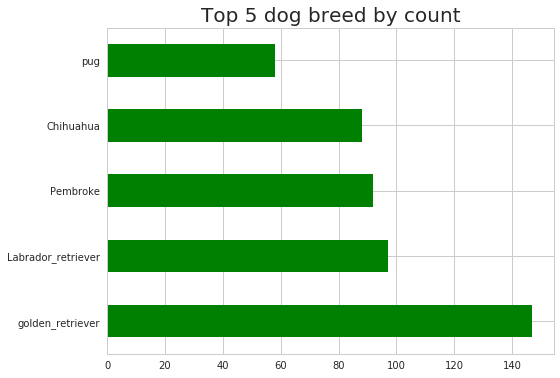

In [142]:
#horizontal bar chart to show the top five breeds
top_5 = twitter_master['Dog_Breed'].value_counts()[:5]
top_5.plot(kind='barh',figsize=(8,6), color="Green")
plt.title("Top 5 dog breed by count", size=20)
plt.savefig("new_folder/topbreed", dpi=900)

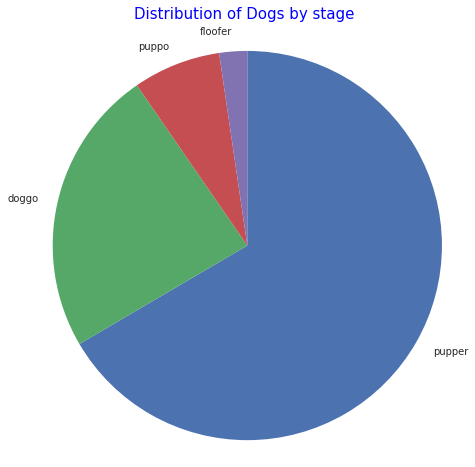

In [145]:
#pie chart to show the distrubution of dog stages
sorted_counts = twitter_master['development_stage'].value_counts()
plt.pie(sorted_counts, labels=sorted_counts.index, startangle=90, counterclock = False)
plt.axis('square')
plt.title('Distribution of Dogs by stage', size=15, color='blue')
plt.savefig("new_folder/dogstage")

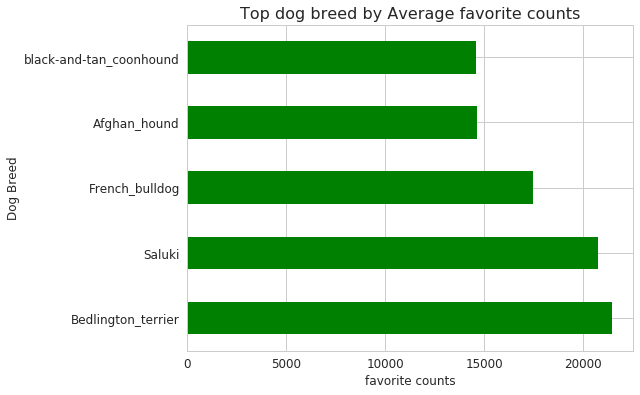

In [141]:
top_stage = twitter_master.groupby('Dog_Breed')['favorite_count'].mean().sort_values(ascending=False)[:5]
plt.figure(figsize=(8,6))
plt.title("Top dog breed by Average favorite counts", size=16)
top_stage.plot(kind='barh',fontsize=12,color='g')
plt.xlabel('favorite counts', fontsize=12)
plt.ylabel('Dog Breed', fontsize=12);
sb.set_style("whitegrid");
plt.savefig("new_folder/topdogstage")

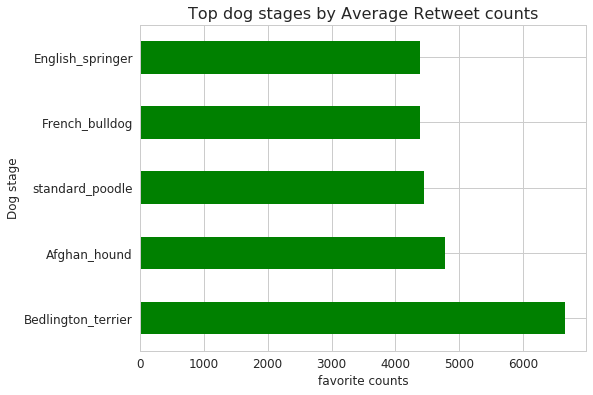

In [128]:
#Top Dog stages by Average retweet Counts
top_stage = twitter_master.groupby('Dog_Breed')['retweet_count'].mean().sort_values(ascending=False)[:5]
plt.figure(figsize=(8,6))
plt.title("Top dog stages by Average Retweet counts", size=16)
top_stage.plot(kind='barh',fontsize=12,color='g')
plt.xlabel('favorite counts', fontsize=12)
plt.ylabel('Dog stage', fontsize=12);
sb.set_style("whitegrid");
plt.savefig("new_folder/topdogstageretweet")

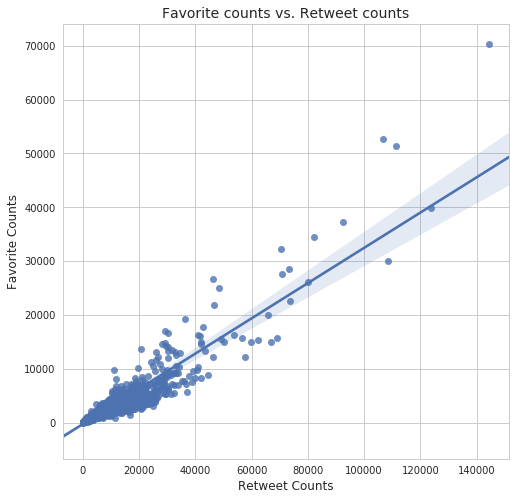

In [129]:
#correlation between retweets and tweets
sb.set(rc={'figure.figsize':(8,8)}, style="whitegrid")
sb.regplot(data = twitter_master, x = 'favorite_count', y='retweet_count')

plt.title("Favorite counts vs. Retweet counts",size=14)
plt.xlabel("Retweet Counts", size=12)
plt.ylabel("Favorite Counts", size=12)
plt.savefig("new_folder/correlation")

In [120]:
#a picture of the dog with the most likes
top_dog = twitter_master.loc[twitter_master[col].idxmax()]

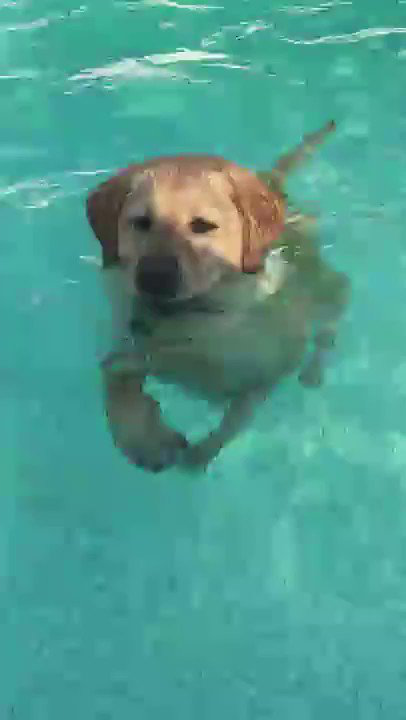

In [122]:
url = top_dog.jpg_url
r = requests.get(url)
Image.open(BytesIO(r.content))